# Importing Libraries

In [146]:
#Importing required libraries to handle and visualize data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing required Machine Learning Libaries to split and process data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Importing required Machine Learning Libraries to predict data based on different ML Models

from sklearn.linear_model import LinearRegression
from sklearn import svm

#Importing required Machine Learning Evaluation Metric Libraries to check performance of different ML Models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

# Importing Dataset

In [51]:
#Importing the data from the same folder as the Notebook to a variable called data using the pandas library

data = pd.read_csv("insurance.csv")

# Visualizing the Data

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As we can see, we have the statistics of the various columns with integer values. From this, we can deduce which data has outliers. We need merely the IQR (Inter Quartile Range) for each column and we can find out which data has outliers. For figuring out the outliers, we have the following formulae:
#### 1. Outlier tolerance in the lower range: Q1 - 1.5 * (IQR). 
#### 2. Outlier tolerance in the higher range: Q3 + 1.5 * (IQR).

#### For the age column, the IQR is 51 - 27 = 24. 

The outlier tolerance for the lower range is: 27 - 1.5 * 24 = -9 (Any value below this is an outlier) (No outliers in our data)

The outlier tolerance for the higher range is: 51 + 1.5 * 24 = 87 (Any value above this is an outlier) (No outliers in our data)

#### For the BMI column, the IQR is 34.69375 - 26.29625 = 8.3975

The outlier tolerance for the lower range is: 26.29625 - 1.5 * 8.3975 = 13.7 (Any value below this is an outlier) (No outliers in our data)

The outlier tolerance for the higher range is: 34.69375 + 1.5 * 8.3975 = 47.29 (Any value above this is an outlier) (We have some outliers in our data)

We do not consider the outliers for children as the range is too small.
We do not consider the outliers for charges as that is our output data, which we will use to train the model

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can understand the statistics of the data, and we observe that there are no values in the data that are null.

# Removing Outliers

We will now remove the outliers based on the BMI we found earlier to ensure that our data is accurate when we do the exploratory data analysis

In [55]:
data.drop(data[data['bmi'] > 47.29].index, inplace = True)

We will now check what differences are now observed from earlier

In [56]:
data.describe()

,age,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,30.537348,1.096313,13212.333374
std,14.047835,5.919946,1.207928,11997.236429
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.300000,1.000000,9361.326800
75%,51.000000,34.485000,2.000000,16586.497710
max,64.000000,46.750000,5.000000,62592.873090


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


As we can now see, the total number of entries have been reduced from 1338 to 1329

# Exploratory Data Analysis

We will now analyze the dataset given and the relationship(s) between the various columns and their impact on one another

### 1. Distribution of BMI

<AxesSubplot:>

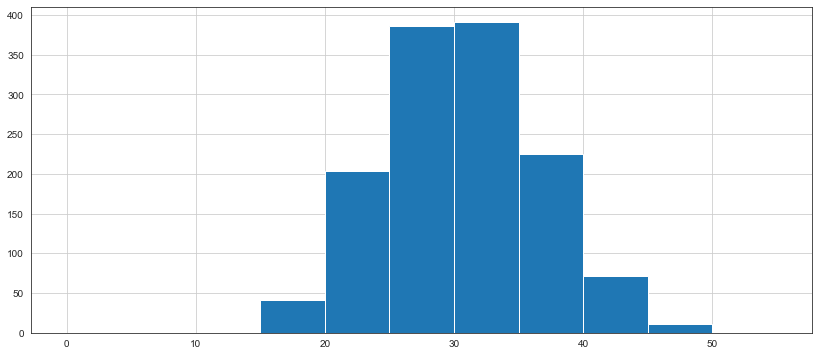

In [58]:
BMI = data.loc[:, 'bmi']
indices = np.arange(start = 0, stop = 60, step = 5)
BMI.hist(bins = indices, figsize = [14, 6])

As we can clearly see, the BMI of the people is mostly between the ranges of 20 to 40

### 2. Relation between Smoker and Charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

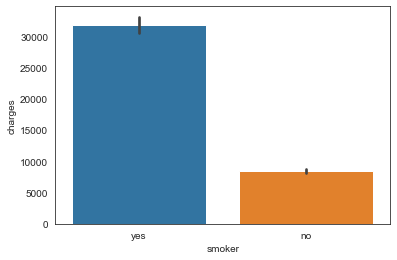

In [59]:
sns.barplot(x = 'smoker', y = 'charges', data = data)

The data indicates that there is a higher insurance charge given to those who are smokers compared to non - smokers

<AxesSubplot:xlabel='smoker', ylabel='charges'>

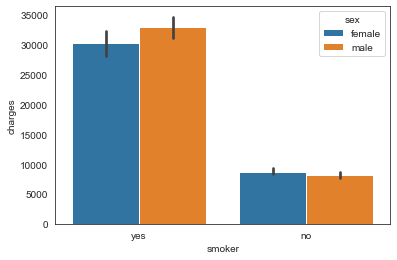

In [60]:
sns.barplot(x = 'smoker', y = 'charges', data = data, hue = 'sex')

We can see that the distribution of the data is the same for males as well as females when comparing smokers

### 3. Relation between Smoker and Region

<AxesSubplot:xlabel='smoker', ylabel='region'>

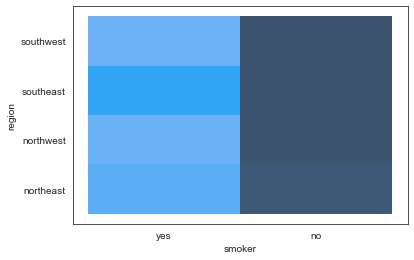

In [61]:
sns.histplot(x = 'smoker', y = 'region', data = data)

From this we can deduce that the smokers and non-smokers are evenly distributed across all regions, i.e., there is no majority of smokers from a particular region

<AxesSubplot:xlabel='region', ylabel='charges'>

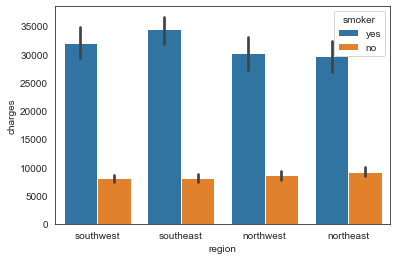

In [62]:
sns.barplot(x = 'region', y = 'charges', data = data, hue = 'smoker')

From the above we can deduce that there is no correlation between smokers and region, i.e., they are evenly distributed

### 4. Relation between BMI and Sex

<AxesSubplot:xlabel='bmi', ylabel='sex'>

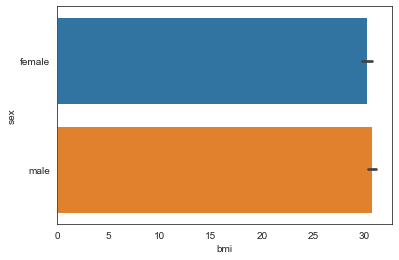

In [63]:
sns.barplot(x = 'bmi', y = 'sex', data = data)

We can deduce that there is an even distribution among both sexes for BMIs of all ranges, i.e., the data is not biased towards either sex

### 5. Relation between Age and BMI

<AxesSubplot:xlabel='age', ylabel='bmi'>

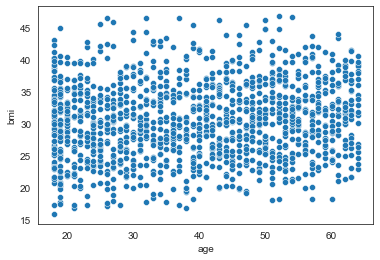

In [64]:
sns.scatterplot(x = 'age', y = 'bmi', data = data)

We can see from the above that there is no bias towards age and bmi, i.e., people of all ages have BMIs of all ranges

### 6. Relation between BMI and Children

<AxesSubplot:xlabel='bmi', ylabel='children'>

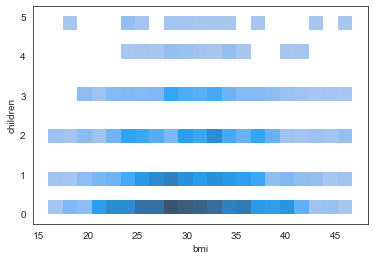

In [65]:
sns.histplot(x = 'bmi', y = 'children', data = data)

From the above we can observe that people of all BMI ranges have kids between 0 and 3, and people with 4 kids or 5 kids is rare but varied across different BMI ranges, so there is no correlation here

### 7. Relation between BMI and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

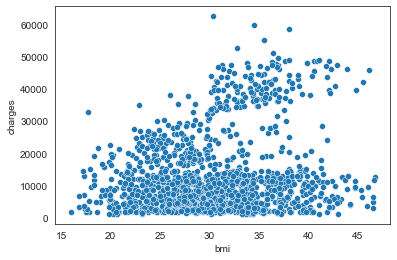

In [66]:
sns.scatterplot(x = 'bmi', y = 'charges', data = data)

From the above, we can clearly observe, that people with BMIs greater than average are charged higher.

### 8. Relation between Region, Smoker and BMI

<AxesSubplot:xlabel='bmi', ylabel='region'>

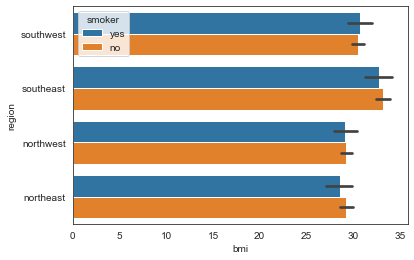

In [67]:
sns.barplot(x = 'bmi', y = 'region', data = data, hue = 'smoker')

From the above we can deduce that the regions do not have a correlation with the BMI, i.e., it is evenly distributed among all the regions

### 9. Region with most Children

### 10. Distribution of data in terms of Sex

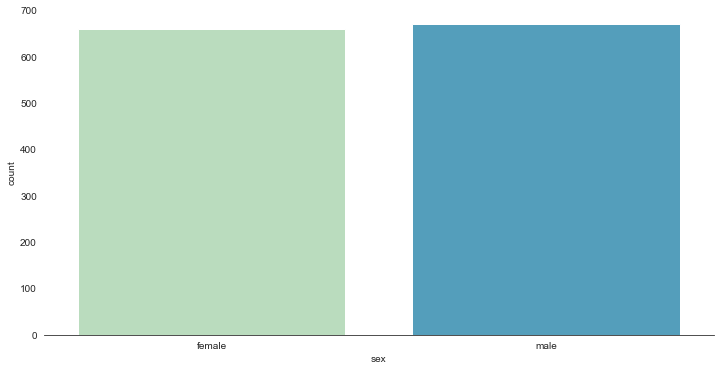

In [68]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x = 'sex', data = data, palette = 'GnBu')
sns.despine(left = True)

From the above we can see that there is an equal percentage of males and females in this dataset

### 11. Relation between BMI, Charges and Sex

<AxesSubplot:xlabel='bmi', ylabel='charges'>

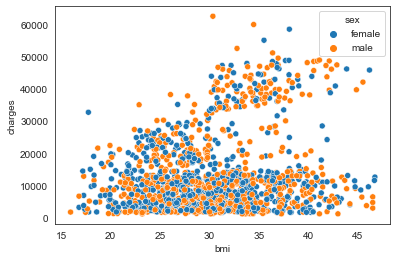

In [69]:
sns.scatterplot(x = 'bmi', y = 'charges', data = data, hue = 'sex')

From the above, we can deduce that persons with BMI higher than average are charged higher, and that their sex is not relevant in this case, i.e., it is not biased towards sex of the person

### 12. Relation between BMI, Charges and Smoker

<AxesSubplot:xlabel='bmi', ylabel='charges'>

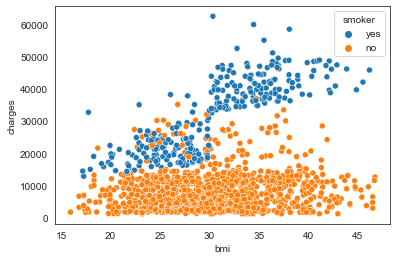

In [70]:
sns.scatterplot(x = 'bmi', y = 'charges', data = data, hue = 'smoker')

From the above, we can deduce that people who have higher BMI than average and are smokers are charged higher than average compared to non-smokers with average BMI

### 13. Relation between Children and Charges

<AxesSubplot:xlabel='children', ylabel='charges'>

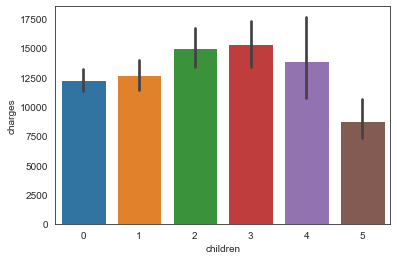

In [71]:
sns.barplot(x = 'children', y = 'charges', data = data)

From the above we can conclude that there is even distribution between insurance charges and the number of children a person has, i.e., no correlation

### 14. Relation between Age and Charges

<AxesSubplot:xlabel='age', ylabel='charges'>

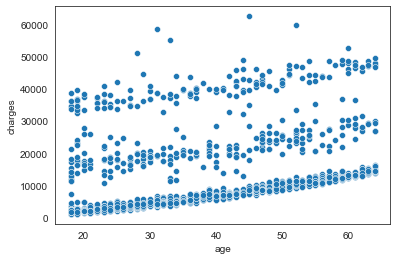

In [72]:
sns.scatterplot(x = 'age', y = 'charges', data = data)

<AxesSubplot:xlabel='age', ylabel='charges'>

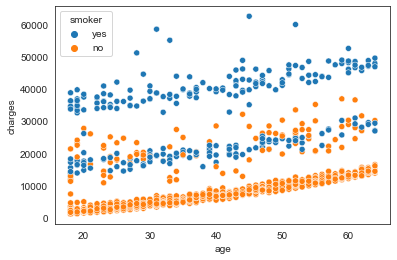

In [73]:
sns.scatterplot(x = 'age', y = 'charges', data = data, hue = 'smoker')

From the above, we can conclude that the charges increase as the age of the person increases, and even more so if the person is a smoker

### 15. Relation between Region and Charges

<AxesSubplot:xlabel='region', ylabel='charges'>

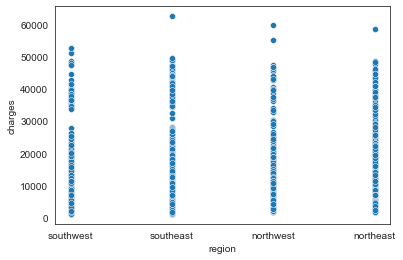

In [74]:
sns.scatterplot(x = 'region', y = 'charges', data = data)

From the above, we can conclude that region has no correlation with the insurance charges.

## Conclusion of Analysis

We can conclude that the main factors affecting the insurance charges are age, BMI and smoker

# Data Preprocessing

### Cleaning the data

In [75]:
#Visualizing the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data above has String values in the columns Sex, Smoker and Region. 
We can use One Hot Encoding to sort out the Sex and Smoker Columns

#### One Hot Encoding

In [76]:
#Storing all the values that are true for male (i.e., the person is a male) and then concatenating it 
#to the original data
Male = pd.get_dummies(data['sex'], drop_first = True)
data = pd.concat([data, Male], axis = 1)

In [77]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [78]:
#Storing all the values that are true for smoker (i.e., the person is a smoker) and then concatenating it 
#to the original data
Smoker = pd.get_dummies(data['smoker'], drop_first = True)
data = pd.concat([data, Smoker], axis = 1)

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


We can now see that we have two new columns, 'male' and 'yes' that indicate whether or not the person in question is a male or a smoker.

#### Dropping and renaming columns

In [80]:
#Renaming the yes column to Smoker
data = data.rename(columns = {'yes': 'Smoker'})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [81]:
#Renaming the male column to Sex
data = data.rename(columns = {'male': 'Sex'})
data.head()

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [82]:
#Dropping the two columns containing Strings
data.drop('sex', axis = 1, inplace = True)
data.drop('smoker', axis = 1, inplace = True)

In [83]:
data.head()

,age,bmi,children,region,charges,Sex,Smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


#### Label Encoder

In [84]:
encoder = LabelEncoder()

data['region'] = encoder.fit_transform(data['region'])

In [85]:
#Renaming all the columns
data = data.rename(columns = {'age' : 'Age'})
data = data.rename(columns = {'bmi' : 'BMI'})
data = data.rename(columns = {'children' : 'Children'})
data = data.rename(columns = {'region' : 'Region'})
data = data.rename(columns = {'charges': 'Charges'})

data.head()

,Age,BMI,Children,Region,Charges,Sex,Smoker
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


Now we have removed all the String values from the data

# Scaling and Splitting the Data

### Scaling the Data

In [86]:
#We use variables to store the scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(data)

In [87]:
#We scale data and store it into a new variable
scaled_data = pd.DataFrame(data = scaler.transform(data), columns = data.columns, index = data.index)

In [88]:
#Print scaled data
print(scaled_data)

           Age       BMI  Children    Region   Charges  Sex  Smoker
0     0.021739  0.387788       0.0  1.000000  0.256431  0.0     1.0
1     0.000000  0.578435       0.2  0.666667  0.009821  1.0     0.0
2     0.217391  0.553426       0.6  0.666667  0.054133  1.0     0.0
3     0.326087  0.219065       0.0  0.333333  0.339389  1.0     0.0
4     0.304348  0.419617       0.0  0.333333  0.044655  1.0     0.0
...        ...       ...       ...       ...       ...  ...     ...
1333  0.695652  0.487496       0.6  0.333333  0.154198  1.0     0.0
1334  0.000000  0.518350       0.0  0.000000  0.017636  0.0     0.0
1335  0.000000  0.678467       0.0  0.666667  0.008263  0.0     0.0
1336  0.065217  0.319584       0.0  1.000000  0.014414  0.0     0.0
1337  0.934783  0.425788       0.0  0.333333  0.455816  0.0     1.0

[1329 rows x 7 columns]


### Splitting the Data

In [186]:
#We store the values in x and y
#We only use the columns of Age, BMI and Smoker as they have the most impact on the output as seen from
#our exploratory data analysis
selected_columns = scaled_data[['Age', 'BMI','Smoker']]
x = selected_columns.copy()
y = scaled_data['Charges']

In [161]:
#Print x
print(x)

           Age       BMI  Smoker
0     0.021739  0.387788     1.0
1     0.000000  0.578435     0.0
2     0.217391  0.553426     0.0
3     0.326087  0.219065     0.0
4     0.304348  0.419617     0.0
...        ...       ...     ...
1333  0.695652  0.487496     0.0
1334  0.000000  0.518350     0.0
1335  0.000000  0.678467     0.0
1336  0.065217  0.319584     0.0
1337  0.934783  0.425788     1.0

[1329 rows x 3 columns]


In [162]:
#Print y
print(y)

0       0.256431
1       0.009821
2       0.054133
3       0.339389
4       0.044655
          ...   
1333    0.154198
1334    0.017636
1335    0.008263
1336    0.014414
1337    0.455816
Name: Charges, Length: 1329, dtype: float64


In [163]:
#We use the train_test_split model to split our data into a 70 to 30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Creating and Training the Models

In [164]:
# Create an object using the LinearRegression() class
linear_regression_model = LinearRegression()

# Create an object using the SVR() class
support_vector_regression_model_linear = svm.SVR(kernel = 'linear')

# Create an object using the SVR() class
support_vector_regression_model_rbf = svm.SVR(kernel = 'rbf')

# Create an object using the SGD() class

In [165]:
#Train the Linear Regression model
linear_regression_model.fit(x_train, y_train)

#Train the Support Vector Regression Model
support_vector_regression_model_linear.fit(x_train, y_train)

#Train the Support Vector Regression Model
support_vector_regression_model_rbf.fit(x_train, y_train)

SVR()

# Prediction of the Models

In [166]:
# Make prediction using the test dataset on Linear Regression model
linear_pred = linear_regression_model.predict(x_test)

# Make prediction using the test dataset on Support Vector Regression model
support_pred_linear = support_vector_regression_model_linear.predict(x_test)

# Make prediction using the test dataset on Support Vector Regression model
support_pred_rbf = support_vector_regression_model_rbf.predict(x_test)

# Comparing the Performances of the Models

### Linear Regression Model Performance

In [167]:
r2_score(y_test, linear_pred)

0.7413842317599587

In [168]:
mean_absolute_error(y_test, linear_pred)

0.07389663643441644

In [169]:
mean_squared_error(y_test, linear_pred)

0.0113874843888952

In [170]:
mean_absolute_percentage_error(y_test, linear_pred)

0.5816370035176655

In [171]:
max_error(y_test, linear_pred)

0.47756785938768875

In [172]:
median_absolute_error(y_test, linear_pred)

0.040860222088569875

### Support Vector Regression Model Performance

In [173]:
r2_score(y_test, support_pred_linear)

0.7377157284462275

In [174]:
r2_score(y_test, support_pred_rbf)

0.780716106627135

In [175]:
mean_absolute_error(y_test, support_pred_linear)

0.07970375503470613

In [176]:
mean_absolute_error(y_test, support_pred_rbf)

0.08784191534394419

In [177]:
mean_squared_error(y_test, support_pred_linear)

0.011549017556420202

In [178]:
mean_squared_error(y_test, support_pred_rbf)

0.009655605802821411

In [179]:
mean_absolute_percentage_error(y_test, support_pred_linear)

0.8530248691797705

In [180]:
mean_absolute_percentage_error(y_test, support_pred_rbf)

1.6706289142166595

In [181]:
max_error(y_test, support_pred_linear)

0.4846908715339192

In [182]:
max_error(y_test, support_pred_rbf)

0.4734946893679063

In [183]:
median_absolute_error(y_test, support_pred_linear)

0.06286835960115092

In [184]:
median_absolute_error(y_test, support_pred_rbf)

0.0851748276499199